In [1]:
using CairoMakie, Printf, LaTeXStrings, BenchmarkTools, Statistics;  #default(fmt=:png)
using NCDatasets, AvailablePotentialEnergyFramework
using JLD

┌ Info: Precompiling AvailablePotentialEnergyFramework [ce1b76f3-601c-5192-adf8-a07e935792b9]
└ @ Base loading.jl:1423


In [2]:
plots_dir = "/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/"
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/largencfiles/"

"/global/cscratch1/sd/aramreye/for_postprocessing/largencfiles/"

In [3]:
nudging_time_list = ["5e-1h", "1h", "2h", "3h", "5h", "8h", "5e-1day", "1day", "2day", "5day", "10day",  "15day"]
experiment_labels = "τᵣ = " .* ["½h", "1h", "2h", "3h", "5h", "8h", "12h", "1d", "2d","5day", "10d",  "15d"];
file_list = string.("f5e-4_2km_1000km_homoRad_homoSfc_nudgeClearsky_",nudging_time_list,"_2d.nc")
push!(file_list,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc")
push!(experiment_labels,"Control")
pushfirst!(file_list,"f5e-4_2km_1000km_homoRad_homoSfc_noscalartransportbysgs_2d.nc")
pushfirst!(experiment_labels,"NoSGS")

14-element Vector{String}:
 "NoSGS"
 "τᵣ = ½h"
 "τᵣ = 1h"
 "τᵣ = 2h"
 "τᵣ = 3h"
 "τᵣ = 5h"
 "τᵣ = 8h"
 "τᵣ = 12h"
 "τᵣ = 1d"
 "τᵣ = 2d"
 "τᵣ = 5day"
 "τᵣ = 10d"
 "τᵣ = 15d"
 "Control"

In [4]:
function read_data(data_dir,filename,var,times)
    Dataset(joinpath(data_dir,filename)) do ds
        output = variable(ds,var)[:,:,times] 
        time = variable(ds,"time")[times] 
        output, time
    end
end

function read_windspeed(data_dir,filename,times)
    Dataset(joinpath(data_dir,filename)) do ds
        u = variable(ds,"USFC")[:,:,times]
        v = variable(ds,"VSFC")[:,:,times]
        time = variable(ds,"time")[times] 
        hypot.(u,v), time
    end
end

read_windspeed (generic function with 1 method)

In [5]:
snapshots_tb = read_data.(data_dir,file_list,"TB",2400:2400);

In [23]:
day_to_index(day) = day*2400÷100
day_to_plot = 90

90

In [24]:
snapshots_sp = read_windspeed.(data_dir,file_list,day_to_index(day_to_plot):day_to_index(day_to_plot));
snapshots_pw = read_data.(data_dir,file_list,"PW",day_to_index(day_to_plot):day_to_index(day_to_plot));

In [25]:
snapshots_pres = read_data.(data_dir,file_list,"PSFC",day_to_index(day_to_plot):day_to_index(day_to_plot));
[extrema(snapshot_pres[1]) for snapshot_pres in snapshots_pres];

In [26]:
x = y = range(0, stop = 1024, length= 512)

0.0:2.003913894324853:1024.0

In [27]:
[extrema(snapshot_sp[1]) for snapshot_sp in snapshots_sp]

14-element Vector{Tuple{Float32, Float32}}:
 (0.013221568, 24.62788)
 (0.005484845, 13.02668)
 (0.0063431025, 14.750118)
 (0.005392625, 17.711817)
 (0.0026428965, 18.27452)
 (0.008143867, 18.438892)
 (0.0038585302, 16.7231)
 (0.0076388246, 15.6367235)
 (0.0032252946, 19.852)
 (0.005894802, 17.76837)
 (0.0026551122, 40.215878)
 (0.0024544524, 25.8587)
 (0.012014341, 33.73651)
 (0.0052072234, 43.698257)

In [28]:
letters = 'a':'z'

'a':1:'z'

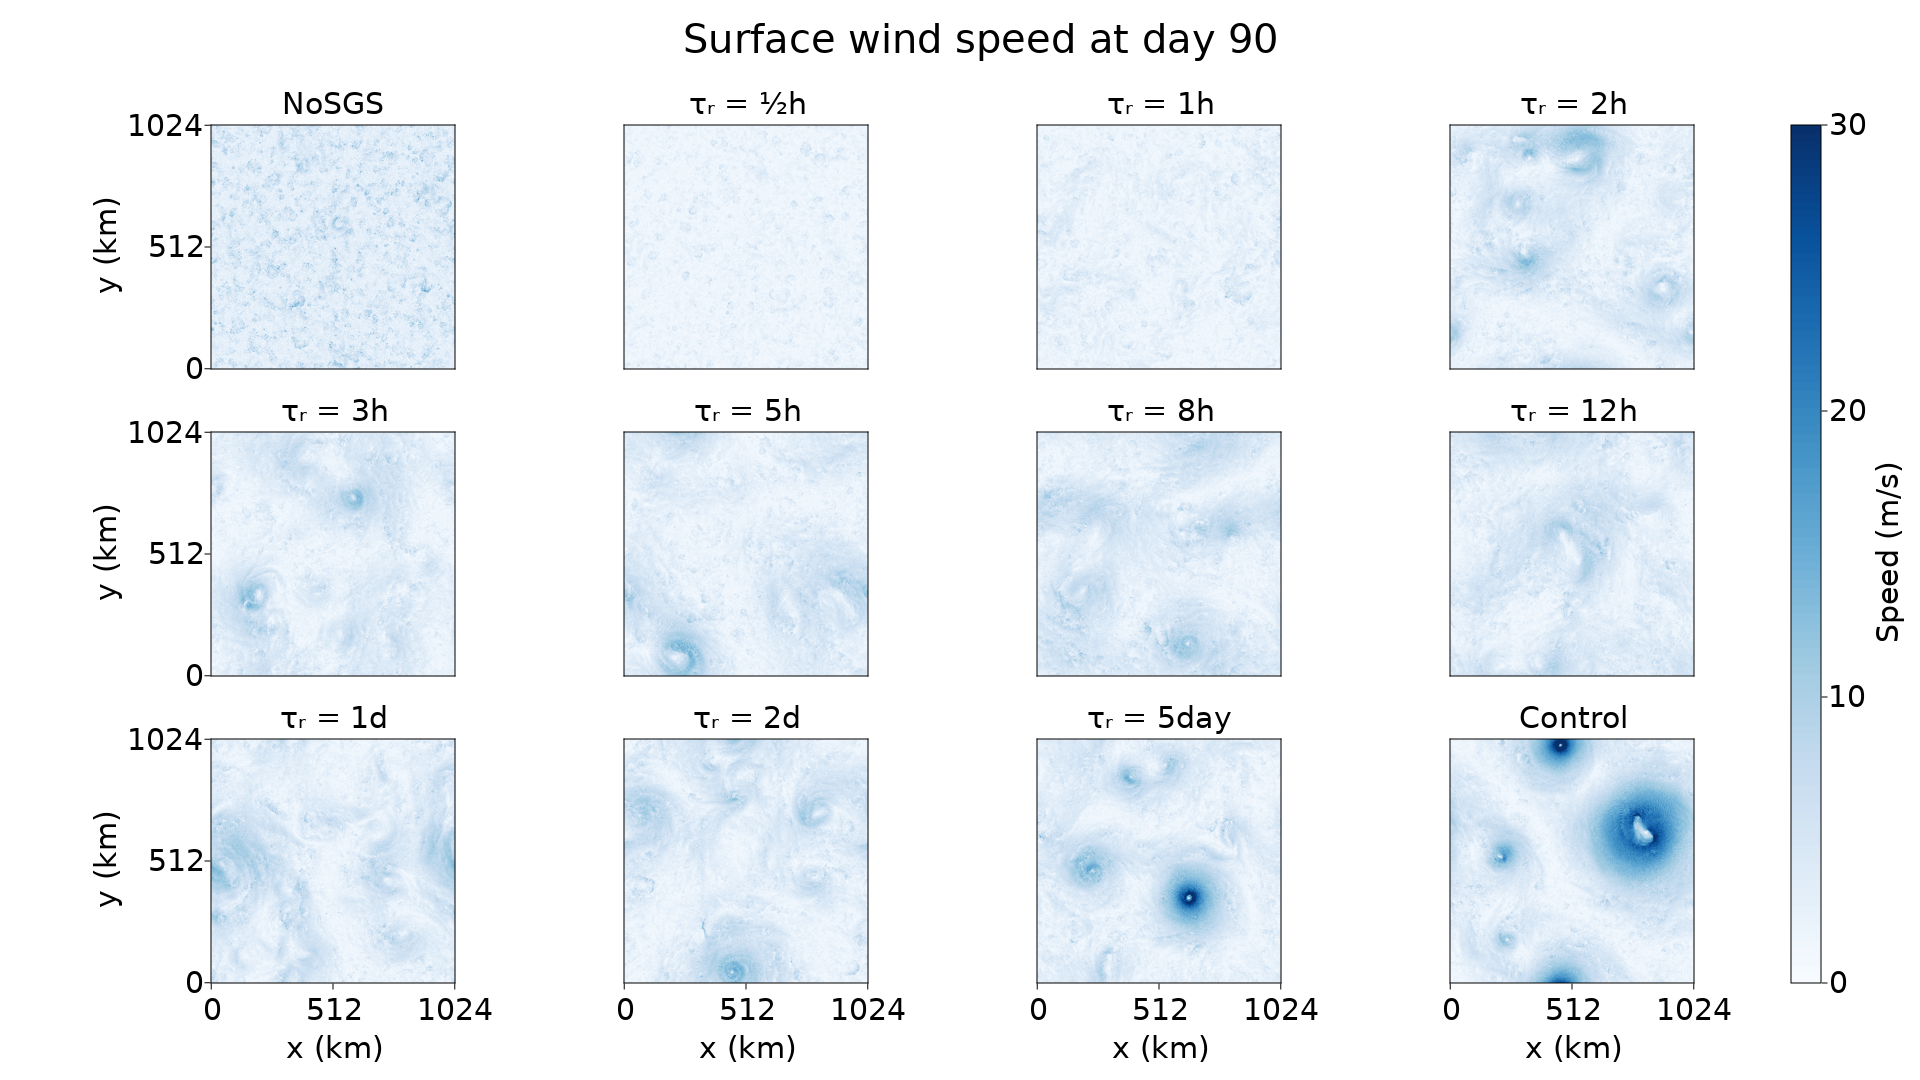

In [29]:
set_theme!(fontsize = 30, Axis = (
        xticks = [0,512,1024],
        yticks = [0,512,1024]))

fig = Figure(resolution = (1920,1080))
axes_list = []
heatmaps_list = []
indices_to_plot = [collect(1:11)... size(snapshots_sp,1)]
for (col, exp) in enumerate(snapshots_sp[indices_to_plot])
    newax = Axis(fig[fldmod1(col,4)...], title = experiment_labels[indices_to_plot[col]], 
        titlesize=30, xlabel = "x (km)", ylabel = "y (km)")
    hm = heatmap!(newax,x,y,exp[1], colorrange = (0,30), colormap = :Blues)
    push!(axes_list,newax), push!(heatmaps_list,hm)
end
Colorbar(fig[:,5],heatmaps_list[1],label="Speed (m/s)", width = 30)
supertitle = fig[0, :] = Label(fig, "Surface wind speed at day $(ceil(Int,snapshots_sp[1][2]))",
    textsize = 40)
hidexdecorations!.(axes_list[[1, 2, 3, 4, 5, 6, 7, 8]])
hideydecorations!.(axes_list[[2, 3, 4, 6, 7, 8, 10, 11, 12]])
for ax in axes_list; ax.aspect = AxisAspect(1); end
resize_to_layout!(fig)
fig

┌ Info: Plotted day 90
└ @ Main In[30]:36


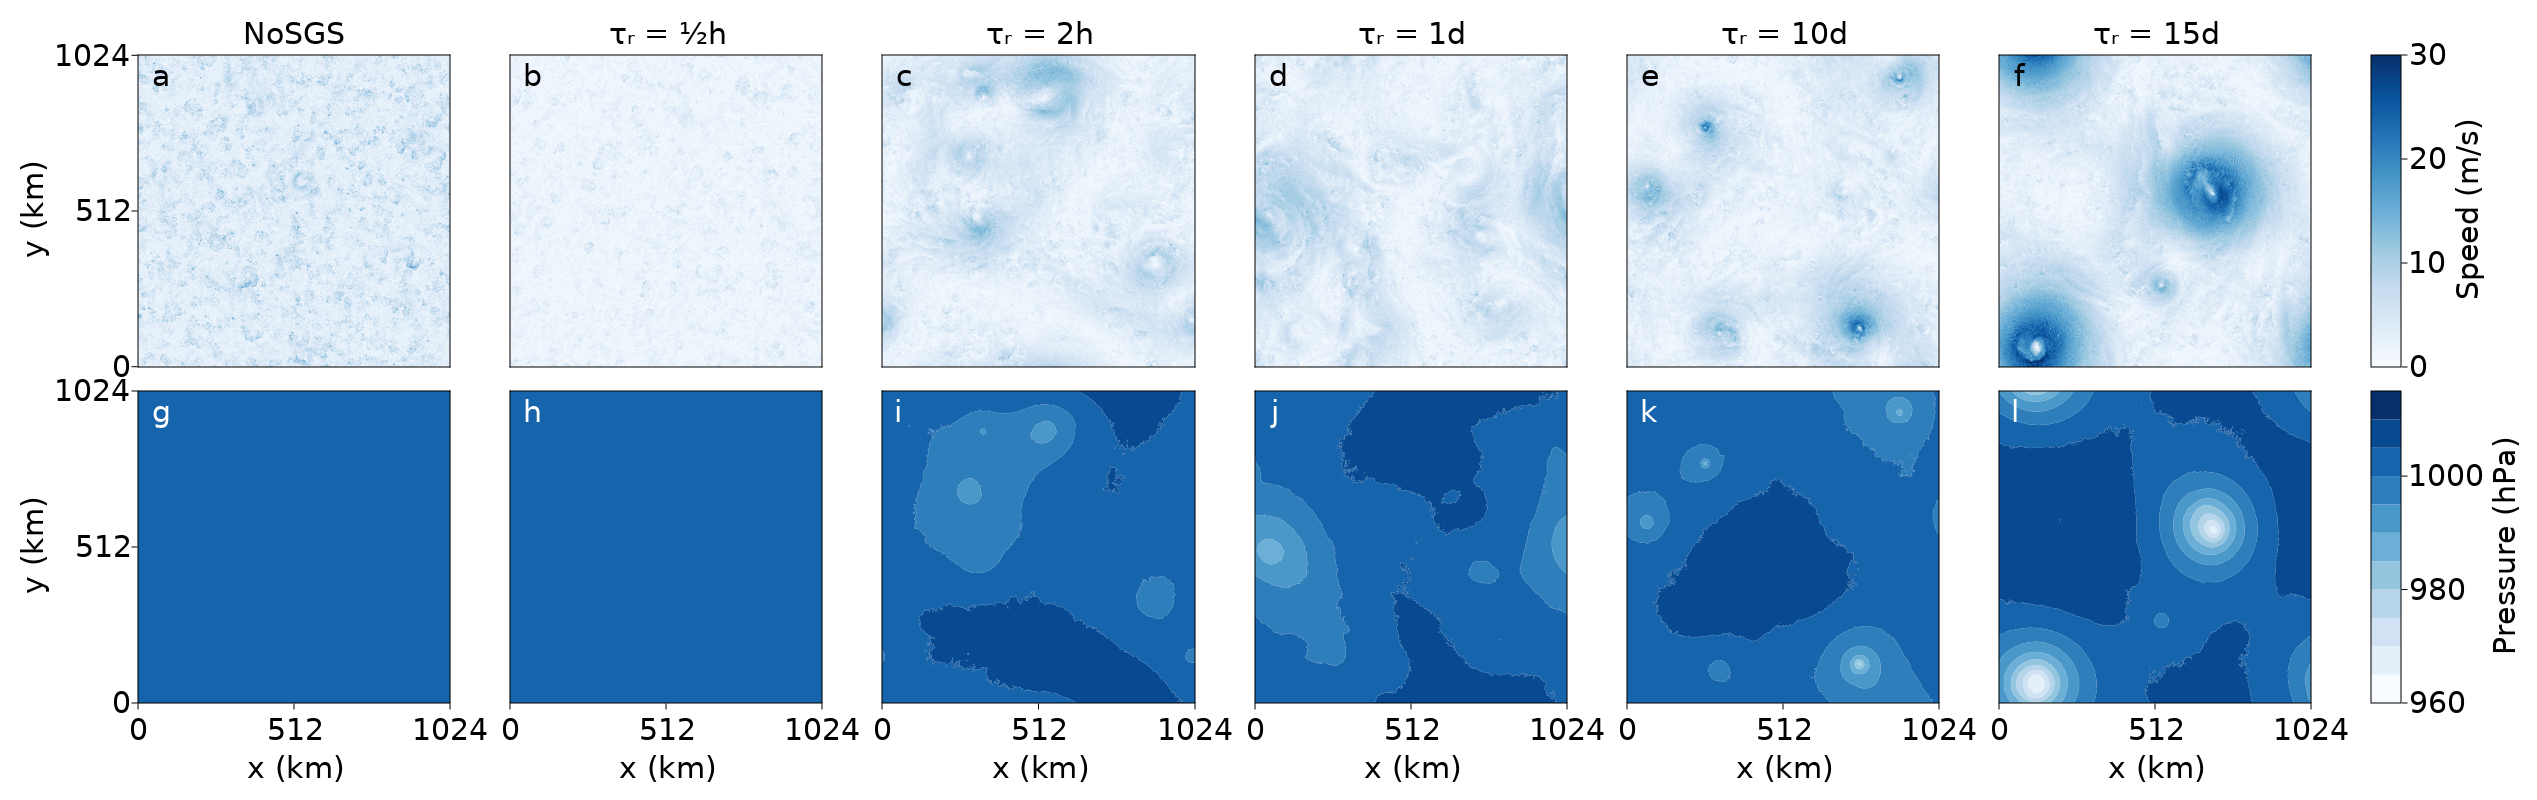

In [30]:
set_theme!(fontsize = 30, colgap = 60,Axis = (
        xticks = [0,512,1024],
        yticks = [0,512,1024]))

fig = Figure(resolution = (2230,800))
axes_list1 = []
axes_list2 = []
heatmaps_list = []
contours_list = []
indices_to_plot = [1,2,4,9,12,13]
for (col, exp) in enumerate(snapshots_sp[indices_to_plot])
    newax = Axis(fig[fldmod1(col,6)...], title = experiment_labels[indices_to_plot[col]], 
        titlesize=30, xlabel = "x (km)", ylabel = "y (km)",aspect = AxisAspect(1))
    hm = heatmap!(newax,x,y,exp[1], colorrange = (0,30), colormap = :Blues)
    text!(newax, position = (50,900),string(letters[col]), textsize = 30)
    push!(axes_list1,newax), push!(heatmaps_list,hm)
end

for (col, exp) in enumerate(snapshots_pres[indices_to_plot])
    newax = Axis(fig[1 + fld1(col,6), mod1(col,6)], 
        xlabel = "x (km)", ylabel = "y (km)",aspect = AxisAspect(1))
    hm = contourf!(newax,x,y,exp[1], colormap = :Blues, levels = 960:5:1015)
    text!(newax, position = (50,900),string(letters[col + 6]), textsize = 30, color=:white)
    push!(axes_list2,newax), push!(contours_list,hm)
end
hideydecorations!.(axes_list1[2:end])
hideydecorations!.(axes_list2[2:end])
hidexdecorations!.(axes_list1)

Colorbar(fig[1,7],heatmaps_list[1],label = "Speed (m/s)", width = 30, tellheight=false)
Colorbar(fig[2,7],contours_list[1],label = "Pressure (hPa)", width = 30, tellheight=false)
tightlimits!.(axes_list2)
[colsize!(fig.layout, col, Aspect(1, 1.0)) for col in 1:6]
#supertitle = fig[0, :] = Label(fig, "Surface wind speed and pressure at day $(ceil(Int,snapshots_sp[1][2]))",
#    textsize = 40)
@info "Plotted day $(ceil(Int,snapshots_sp[1][2]))"
resize_to_layout!(fig)
fig

In [31]:
figure_name = "snapshot_windspeed_and_pressure_varying_tau"
save(joinpath(plots_dir,figure_name*".png"), fig,px_per_unit=4)
save(joinpath(plots_dir,figure_name*".eps"), fig)
save(joinpath(plots_dir,figure_name*".pdf"), fig)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x0000000010ae44d0, 1903.0, 600.0, IOContext(IOStream(<file /global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/snapshot_windspeed_and_pressure_varying_tau.pdf>)))


┌ Info: Plotted day 90
└ @ Main In[32]:57


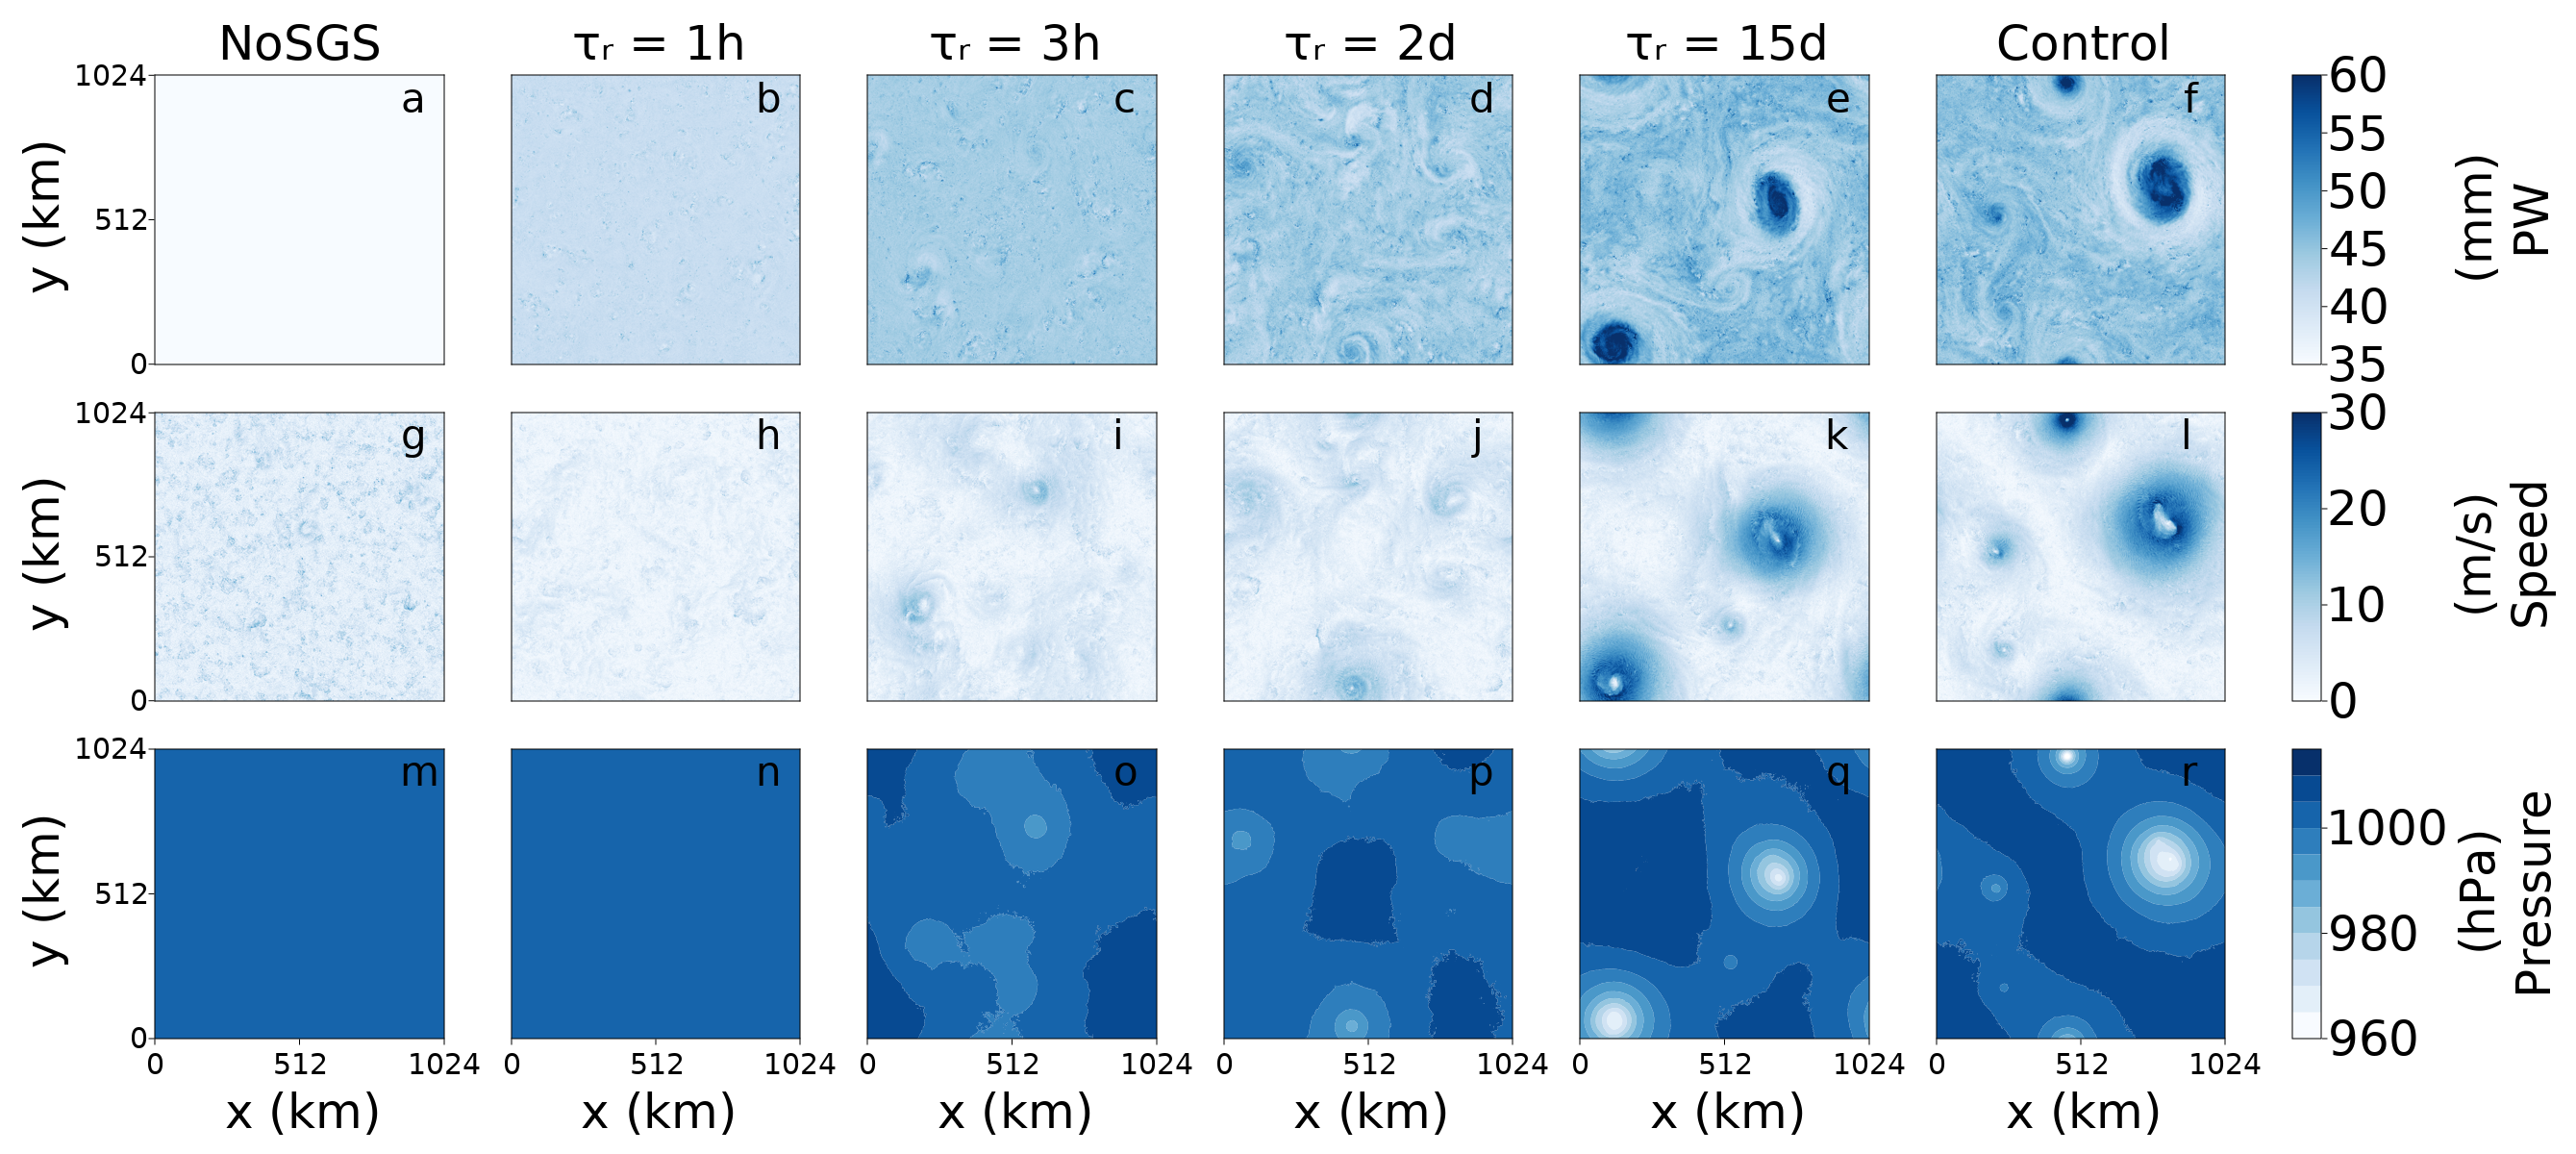

In [32]:
set_theme!(fontsize = 50, colgap = 70, rowgap = 50, Axis = (
        xticks = [0,512,1024],
        yticks = [0,512,1024], xticklabelsize = 30, yticklabelsize = 30))

fig = Figure(resolution = (2230,1200))
axes_list1 = []
axes_list2 = []
axes_list3 = []
plot_list1 = []
plot_list2 = []
plot_list3 = []
indices_to_plot = [1,3,5,10,13,14]

for (col, exp) in enumerate(snapshots_pw[indices_to_plot])
    newax = Axis(fig[fld1(col,6), mod1(col,6)], title = experiment_labels[indices_to_plot[col]],
        xlabel = "x (km)", ylabel = "y (km)",aspect = AxisAspect(1))
    hm = heatmap!(newax,x,y,exp[1], colormap = :Blues, colorrange = (35,60))
    text!(newax, position = (880,860),string(letters[col]), textsize = 42, color=:black)
    push!(axes_list1,newax), push!(plot_list1,hm)
end

for (col, exp) in enumerate(snapshots_sp[indices_to_plot])
    newax = Axis(fig[1 + fld1(col,6), mod1(col,6)],  
        titlesize=30, xlabel = "x (km)", ylabel = "y (km)",aspect = AxisAspect(1))
    hm = heatmap!(newax,x,y,exp[1], colorrange = (0,30), colormap = :Blues)
    text!(newax, position = (880,860),string(letters[col + 6]), textsize = 42)
    push!(axes_list2,newax), push!(plot_list2,hm)
end

for (col, exp) in enumerate(snapshots_pres[indices_to_plot])
    newax = Axis(fig[2 + fld1(col,6), mod1(col,6)], 
        xlabel = "x (km)", ylabel = "y (km)",aspect = AxisAspect(1))
    hm = contourf!(newax,x,y,exp[1], colormap = :Blues, levels = 960:5:1015)
    text!(newax, position = (880,860),string(letters[col + 12]), textsize = 42, color=:black)
    push!(axes_list3,newax), push!(plot_list3,hm)
end



hideydecorations!.(axes_list1[2:end])
hideydecorations!.(axes_list2[2:end])
hideydecorations!.(axes_list3[2:end])
hidexdecorations!.(axes_list1)
hidexdecorations!.(axes_list2)

Colorbar(fig[1,7],plot_list1[1],label = "\n(mm)\nPW", width = 30, tellheight=false)
Colorbar(fig[2,7],plot_list2[1],label = "\n(m/s)\nSpeed", width = 30, tellheight=false)
Colorbar(fig[3,7],plot_list3[1],label = "(hPa)\nPressure", width = 30, tellheight=false)

tightlimits!.(axes_list1)
tightlimits!.(axes_list2)
tightlimits!.(axes_list3)

[colsize!(fig.layout, col, Aspect(1, 1.0)) for col in 1:6]
#supertitle = fig[0, :] = Label(fig, "Surface wind speed and pressure at day $(ceil(Int,snapshots_sp[1][2]))",
#    textsize = 40)
@info "Plotted day $(ceil(Int,snapshots_sp[1][2]))"
resize_to_layout!(fig)
fig

In [33]:
figure_name = "snapshot_windspeed_and_pressure_and_watervapor_varying_tau"
save(joinpath(plots_dir,figure_name*".png"), fig,px_per_unit=4)
save(joinpath(plots_dir,figure_name*".eps"), fig)
save(joinpath(plots_dir,figure_name*".pdf"), fig)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000d48e1b0, 2009.0, 900.0, IOContext(IOStream(<file /global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/snapshot_windspeed_and_pressure_and_watervapor_varying_tau.pdf>)))


┌ Info: (9.518578f0, 15.941616f0)
└ @ Main In[36]:1


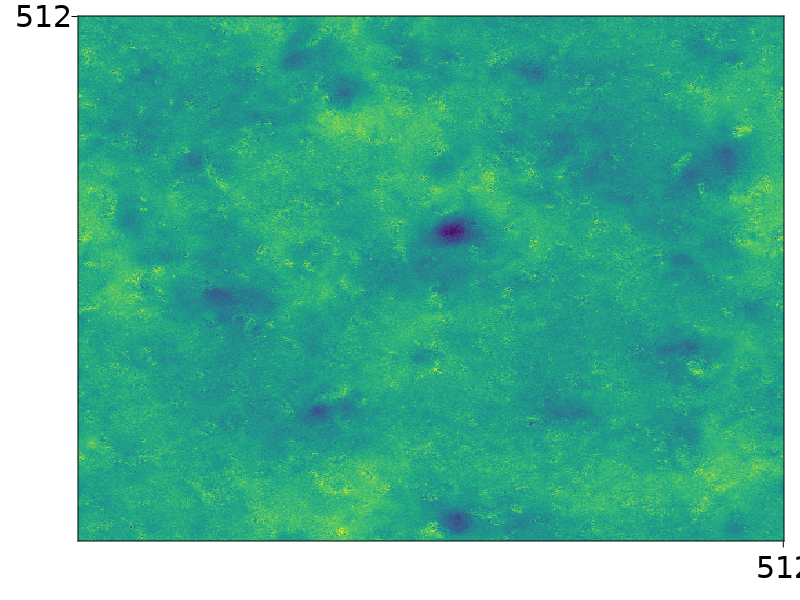

In [36]:
@info extrema(snapshots_pw[1][1])
heatmap(snapshots_pw[1][1])